# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [2]:
import zipfile
from PIL import Image, ImageDraw, ImageOps
import pytesseract as tsr
import cv2 as cv
import numpy as np





In [3]:
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')


In [4]:
zip_small_files_name = 'readonly/small_img.zip'
zip_big_files_name = 'readonly/images.zip'
# the rest is up to you!
def unzip_imagefiles():
    print('unziping files ...')
    images_dict = {}
    with zipfile.ZipFile(zip_big_files_name, 'r') as zip_files: 
        for file_name in zip_files.namelist():
            print('unzip file_name: ', file_name)
            with zip_files.open(file_name, 'r') as f:
                img = Image.open(f).convert('RGB')
                images_dict[file_name] = {'imgkey':img}
                #print('image added to dictionary')
    return images_dict

In [5]:
#####################
def parse_text_and_update(images):
    print('parsing texts...')
    for fname in images.keys():
        #print('parse fname: ', fname)
        #print('type: ', type(images[fname]['imgkey']))
        txt = tsr.image_to_string(images[fname]['imgkey'])
        images[fname]['text'] = txt #'Christopher'
        
    return images


In [6]:
def detect_faces_and_update(images):
    print('creating faces box ....')
    for fname in images.keys():
        new_img = np.array(images[fname]['imgkey'])
        new_img = cv.cvtColor(new_img,cv.COLOR_BGR2GRAY)
        faces_boxs = face_cascade.detectMultiScale(new_img, 1.3, 5)
        faces = []
    
        for x,y,w,h in faces_boxs:
            img = images[fname]['imgkey']
            fc = img.crop((x,y,x+w,y+h))
            faces.append(fc)
        
        images[fname]['faces'] = faces
        print('fname: ', fname, ' faces count: ', len(faces))
    
    return images

In [7]:
def create_thumbnail_and_update(images):
    print('creating thumnail...')
    for imgname in images.keys():
        for fcimg in images[imgname]['faces']:
            fcimg.thumbnail((100,100),Image.ANTIALIAS)

    return images


In [8]:
def create_contact_sheet(imgname, imgdict, srtxt): 
    print('creating contact sheet... ',srtxt)
    if srtxt in imgdict['text'] and len(imgdict['faces']) > 0:
        print("Result found in file {}".format(imgname))
        h = int(len(imgdict['faces']) // 5)
        contact_sheet = Image.new('RGB',(500, 100 * h))
        x = 0
        y = 0
        for fc in imgdict['faces']:
            contact_sheet.paste(fc,(x,y))
            if x + 100 == contact_sheet.width:
                x = 0
                y += 100
            else: x += 100
        display(contact_sheet)
    else:
        print("Result found in file {} \nBut there were no faces in that file\n\n".format(imgname))

##########################
def searchText(images, srtxt):
    print('searhing text...: ',srtxt)
    #print('images_dict typte: ',type(images))
    for filename in images.keys():
        create_contact_sheet(filename, images[filename], srtxt)

#########################

unziping files ...
unzip file_name:  a-0.png
unzip file_name:  a-1.png
unzip file_name:  a-10.png
unzip file_name:  a-11.png
unzip file_name:  a-12.png
unzip file_name:  a-13.png
unzip file_name:  a-2.png
unzip file_name:  a-3.png
unzip file_name:  a-4.png
unzip file_name:  a-5.png
unzip file_name:  a-6.png
unzip file_name:  a-7.png
unzip file_name:  a-8.png
unzip file_name:  a-9.png
procesing time(mins):  0.0 

parsing texts...
procesing time(mins):  21.0 

creating faces box ....
fname:  a-0.png  faces count:  6
fname:  a-1.png  faces count:  5
fname:  a-10.png  faces count:  0
fname:  a-11.png  faces count:  0
fname:  a-12.png  faces count:  0
fname:  a-13.png  faces count:  1
fname:  a-2.png  faces count:  2
fname:  a-3.png  faces count:  2
fname:  a-4.png  faces count:  0
fname:  a-5.png  faces count:  6
fname:  a-6.png  faces count:  2
fname:  a-7.png  faces count:  0
fname:  a-8.png  faces count:  0
fname:  a-9.png  faces count:  1
procesing time(mins):  25.0 

creating thumnail

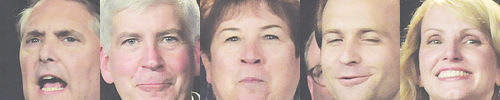

creating contact sheet...  Christopher
Result found in file a-1.png 
But there were no faces in that file


creating contact sheet...  Christopher
Result found in file a-10.png 
But there were no faces in that file


creating contact sheet...  Christopher
Result found in file a-11.png 
But there were no faces in that file


creating contact sheet...  Christopher
Result found in file a-12.png 
But there were no faces in that file


creating contact sheet...  Christopher
Result found in file a-13.png 
But there were no faces in that file


creating contact sheet...  Christopher
Result found in file a-2.png 
But there were no faces in that file


creating contact sheet...  Christopher
Result found in file a-3.png


SystemError: tile cannot extend outside image

<PIL.Image.Image image mode=RGB size=500x0 at 0x7F816D3EB048>

creating contact sheet...  Christopher
Result found in file a-4.png 
But there were no faces in that file


creating contact sheet...  Christopher
Result found in file a-5.png 
But there were no faces in that file


creating contact sheet...  Christopher
Result found in file a-6.png 
But there were no faces in that file


creating contact sheet...  Christopher
Result found in file a-7.png 
But there were no faces in that file


creating contact sheet...  Christopher
Result found in file a-8.png 
But there were no faces in that file


creating contact sheet...  Christopher
Result found in file a-9.png 
But there were no faces in that file


total procesing time(mins):  25.0 



In [9]:
import time
t1 = time.time()
######################
images_dict = unzip_imagefiles()
t2 = time.time()
print('procesing time(mins): ', (t2-t1)//60,'\n')

images_dict = parse_text_and_update(images_dict)
t2 = time.time()
print('procesing time(mins): ', (t2-t1)//60,'\n')

images_dict = detect_faces_and_update(images_dict)
t2 = time.time()
print('procesing time(mins): ', (t2-t1)//60,'\n')

images_dict = create_thumbnail_and_update(images_dict)
t2 = time.time()
print('procesing time(mins): ', (t2-t1)//60,'\n')

#print(images_dict)
searchText(images_dict, 'Christopher') 
t2 = time.time()
print('total procesing time(mins): ', (t2-t1)//60,'\n')
#searchText(images_dict, 'Mark')  
#searchText(images_dict, 'pizza')  
    

searhing text...:  Mark
creating contact sheet...  Mark
Result found in file a-0.png


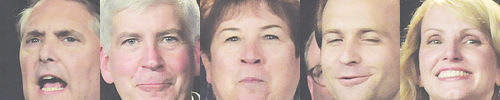

creating contact sheet...  Mark
Result found in file a-1.png


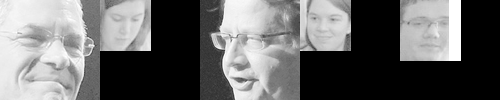

creating contact sheet...  Mark
Result found in file a-10.png 
But there were no faces in that file


creating contact sheet...  Mark
Result found in file a-11.png 
But there were no faces in that file


creating contact sheet...  Mark
Result found in file a-12.png 
But there were no faces in that file


creating contact sheet...  Mark
Result found in file a-13.png


SystemError: tile cannot extend outside image

<PIL.Image.Image image mode=RGB size=500x0 at 0x7F816D442828>

creating contact sheet...  Mark
Result found in file a-2.png


SystemError: tile cannot extend outside image

<PIL.Image.Image image mode=RGB size=500x0 at 0x7F816D442BA8>

creating contact sheet...  Mark
Result found in file a-3.png


SystemError: tile cannot extend outside image

<PIL.Image.Image image mode=RGB size=500x0 at 0x7F816D442D68>

creating contact sheet...  Mark
Result found in file a-4.png 
But there were no faces in that file


creating contact sheet...  Mark
Result found in file a-5.png 
But there were no faces in that file


creating contact sheet...  Mark
Result found in file a-6.png 
But there were no faces in that file


creating contact sheet...  Mark
Result found in file a-7.png 
But there were no faces in that file


creating contact sheet...  Mark
Result found in file a-8.png 
But there were no faces in that file


creating contact sheet...  Mark
Result found in file a-9.png 
But there were no faces in that file


total procesing time(mins):  25.0 



In [10]:
searchText(images_dict, 'Mark') 
t2 = time.time()
print('total procesing time(mins): ', (t2-t1)//60,'\n')

In [11]:
searchText(images_dict, 'pizza') 
t2 = time.time()
print('total procesing time(mins): ', (t2-t1)//60,'\n')

searhing text...:  pizza
creating contact sheet...  pizza
Result found in file a-0.png 
But there were no faces in that file


creating contact sheet...  pizza
Result found in file a-1.png 
But there were no faces in that file


creating contact sheet...  pizza
Result found in file a-10.png 
But there were no faces in that file


creating contact sheet...  pizza
Result found in file a-11.png 
But there were no faces in that file


creating contact sheet...  pizza
Result found in file a-12.png 
But there were no faces in that file


creating contact sheet...  pizza
Result found in file a-13.png 
But there were no faces in that file


creating contact sheet...  pizza
Result found in file a-2.png


SystemError: tile cannot extend outside image

<PIL.Image.Image image mode=RGB size=500x0 at 0x7F816D442EF0>

creating contact sheet...  pizza
Result found in file a-3.png 
But there were no faces in that file


creating contact sheet...  pizza
Result found in file a-4.png 
But there were no faces in that file


creating contact sheet...  pizza
Result found in file a-5.png 
But there were no faces in that file


creating contact sheet...  pizza
Result found in file a-6.png 
But there were no faces in that file


creating contact sheet...  pizza
Result found in file a-7.png 
But there were no faces in that file


creating contact sheet...  pizza
Result found in file a-8.png 
But there were no faces in that file


creating contact sheet...  pizza
Result found in file a-9.png 
But there were no faces in that file


total procesing time(mins):  25.0 

